In [15]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

In [16]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_cat_to_num.csv'


In [17]:
df <- read.csv(file = file)
data <- df
head(data)

num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,alim17_3,⋯,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.2867859,0.5983843,⋯,0.5366417,0.8557415,0.6964801,0.9976919,0.9884593,0.9607617,0.06000000,0.141129032,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.8718984,0.5983843,⋯,0.5366417,0.8557415,1.0000000,0.9976919,0.9884593,0.9607617,0.02571429,0.004032258,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.9469129,0.5522216,0.4483555,⋯,0.5366417,0.8557415,0.6964801,0.9976919,0.9884593,0.9607617,0.04857143,0.070564516,0.8880554,1.0000000
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8840162,0.2867859,0.9001731,⋯,1.0000000,1.0000000,0.6964801,0.9976919,0.9884593,0.9607617,0.03428571,0.060483871,0.8880554,0.8003462
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.9428736,0.4483555,⋯,0.5366417,0.8557415,1.0000000,0.9976919,0.9884593,0.9607617,0.08857143,0.060483871,0.8880554,0.5856896
0.9907675,0.729371,0.9376803,0.8332372,0.8188113,0.9221004,0.8661281,0.8442008,0.2867859,0.4483555,⋯,1.0000000,0.8557415,0.6964801,0.9976919,0.9884593,1.0000000,0.09428571,0.483870968,0.8880554,1.0000000


In [19]:
ncol(data)

[1] 75

In [20]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [21]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
num_trab_d,0.0559230
acc_alim1,0.5838834
acc_alim2,0.2333031
acc_alim3,0.4507160
acc_alim4,0.4731912
acc_alim5,0.2736092


In [22]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
72,est_alim,4.319120
73,est_trans,3.310052
47,anio_estuf,3.282109
45,anio_refri,3.204282
49,anio_lavad,3.111690
41,anio_licua,3.033139


Saving 7 x 7 in image


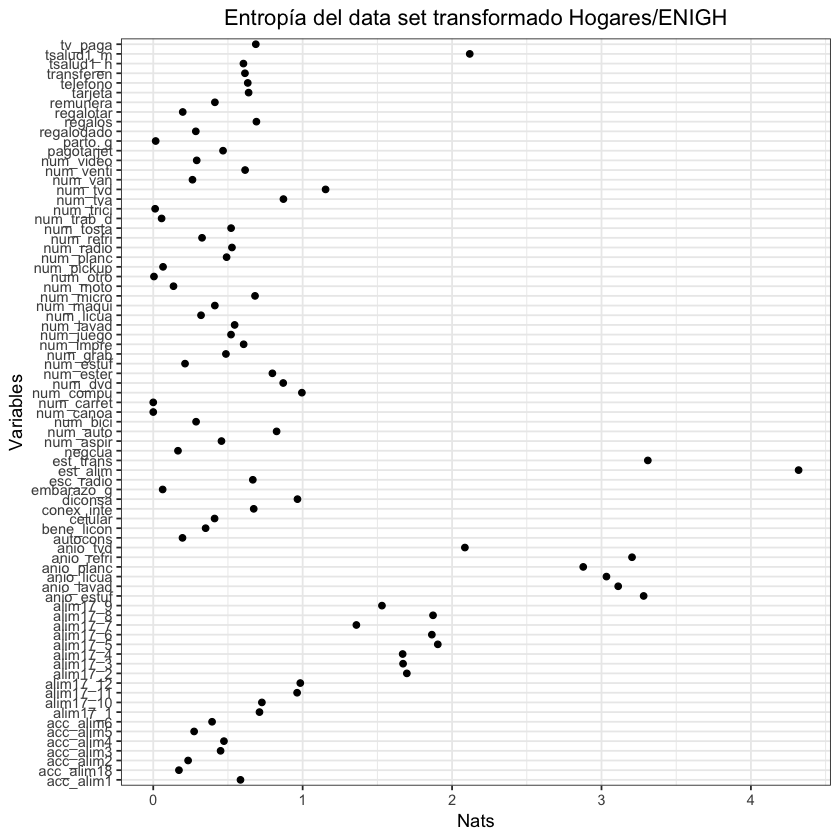

In [14]:
ggplot(df_entropy, aes(y=data_names, x=data_entropy)) + 
    theme_bw() +
    ggtitle('Entropía del data set transformado Hogares/ENIGH') + 
    xlab('Nats') +
    ylab("Variables")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/HOGARES/entropy_transform.png", dpi = 300)


Saving 7 x 7 in image


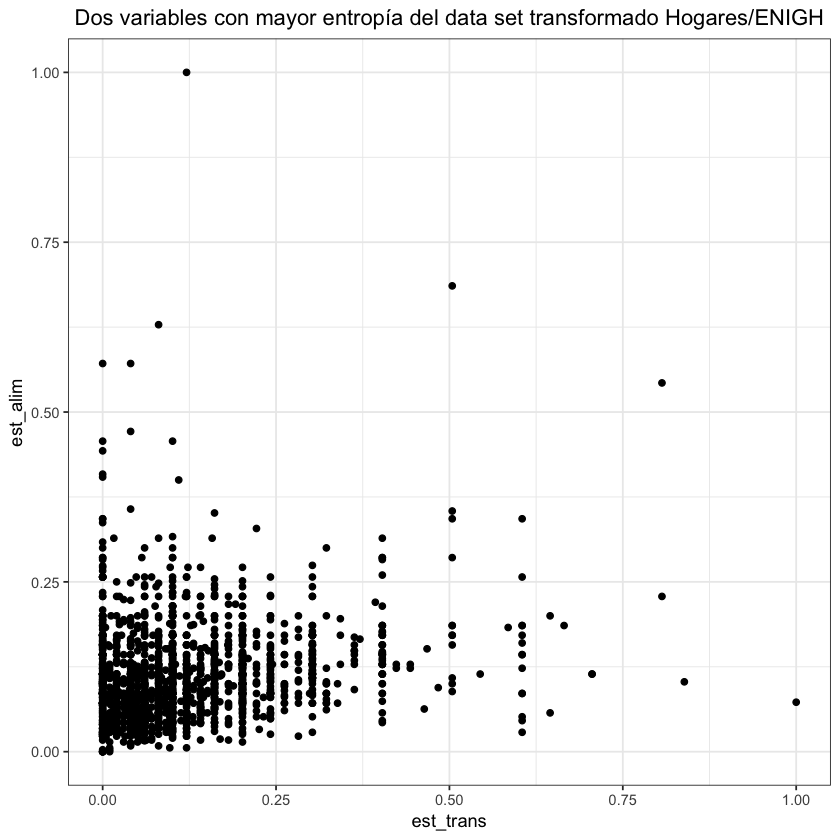

In [12]:
ggplot(data = data, 
       aes(y=data$est_alim, 
           x=data$est_trans))+
    theme_bw() +
    ggtitle('Dos variables con mayor entropía del data set transformado Hogares/ENIGH') + 
    xlab('est_trans') +
    ylab("est_alim")+
    theme(plot.title = element_text(hjust = 0.5))+
    geom_point()+
    ggsave(filename = "../../../../../../images/enigh/HOGARES/entropy_transform_2_var.png", dpi = 300)


In [23]:
png("../../../../../../images/enigh/HOGARES/entropy_transform_3_var.png")
scatterplot3d(y=data$est_alim, 
              x=data$est_trans,
              z=data$anio_estuf, pch = 19, 
              color = "black", 
              main="Tres variables con mayor entropía del data set transformado Hogares/ENIGH",
              xlab = 'est_alim', 
              ylab = 'est_trans',
              zlab = 'anio_estuf') 
dev.off()

pdf 
  2

In [24]:
file = '../../../../../../dataframes/enigh/HOGARES/df_entropy_tranform_cat_to_num.csv'

In [25]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
